## Logistic Regression
- It is a Classification algorithm
- Example:- Detection of spam emails etc..
------------------------------------------------------------------------
- Log Loss AKA Binary Cross Entropy :
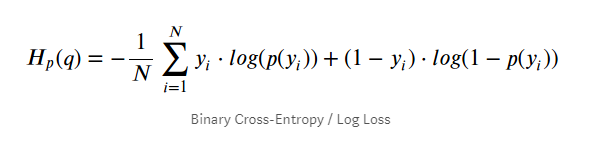
________________________________________________________________________

- Data Prepration
- Visualization
- Create Train and Test Set 
- Create a Logistic Regression Model
- Predictions 
- Decision Boundary 
- How to use sk-learn

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
# Data Generate
mean_01 = np.array([1,0.5])
cov_01 = np.array([[1,0.1],[0.1,1.2]])

mean_02 = np.array([4,5])
cov_02 = np.array([[1.21,0.1],[0.1,1.3]])


# Normal Distribution
dist_01 = np.random.multivariate_normal(mean_01,cov_01,500)
dist_02 = np.random.multivariate_normal(mean_02,cov_02,500)

print(dist_01.shape)
print(dist_02.shape)

(500, 2)
(500, 2)


In [3]:
dist_01.shape, dist_02.shape

((500, 2), (500, 2))

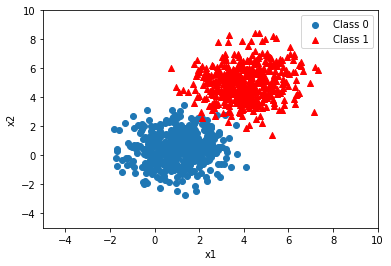

In [4]:
plt.figure(0)

plt.scatter(dist_01[:,0],dist_01[:,1],label='Class 0')
plt.scatter(dist_02[:,0],dist_02[:,1],color='r',marker='^',label='Class 1')
plt.xlim(-5,10)
plt.ylim(-5,10)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

In [5]:
data = np.zeros((1000,3))
print(data.shape)

(1000, 3)


In [6]:
data[:500,:2] = dist_01
data[500:,:2] = dist_02
data[500:, -1] = 1.0

In [7]:
# Randomally shuffle data 
np.random.shuffle(data)
print(data[:10])

[[5.16478735 4.23258439 1.        ]
 [5.17851293 6.76216907 1.        ]
 [2.18749127 4.83159449 1.        ]
 [3.72266339 3.84774534 1.        ]
 [2.21666764 1.76395975 0.        ]
 [1.67382902 1.20907645 0.        ]
 [0.72384015 0.83137866 0.        ]
 [3.39146106 3.00082792 1.        ]
 [3.46838652 5.26471789 1.        ]
 [0.59151747 0.06689757 0.        ]]


In [8]:
# Divide the data into train and test part
split = int(0.8*data.shape[0])
X_train = data[:split,:-1]
X_test = data[split:, :-1]

Y_train = data[:split, -1]
Y_test = data[split:, -1]

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [9]:
#plot the training dataset and normalize it 

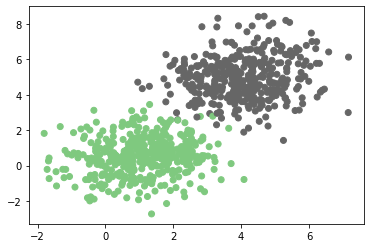

In [10]:
plt.scatter(X_train[:,0], X_train[:,1],c =  Y_train, cmap = plt.cm.Accent)
plt.show()

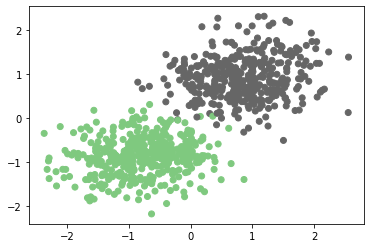

In [11]:
x_mean = X_train.mean(axis = 0)
x_std = X_train.std(axis = 0)

#Apply the transform
X_train = (X_train - x_mean)/x_std

plt.scatter(X_train[:,0], X_train[:,1],c = Y_train, cmap=plt.cm.Accent)
plt.show()

In [12]:
X_train.mean(axis = 0)

array([ 2.12330153e-16, -1.63757896e-17])

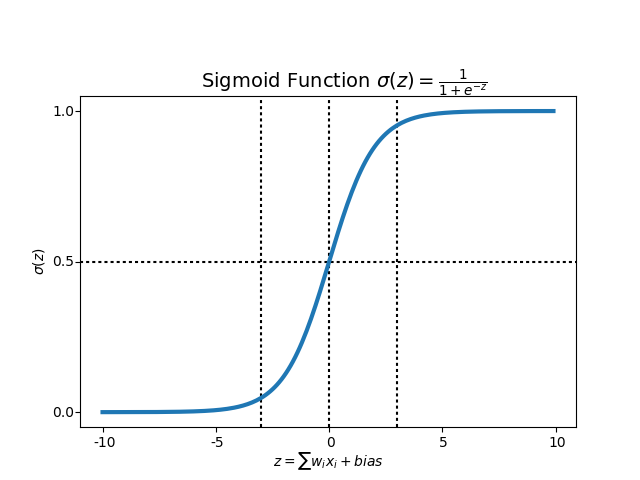

### Logistic Regression Implementation

In [13]:
def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))
    
def hypothesis(X,theta):
    """
    X - entire array(m, n+1)
    theta - np.array(n+1, 1)
    
    """
    return sigmoid(np.dot(X,theta))
def error(X,y,theta):
    """
    params:
    X - (m, n+1)
    y - (m,1)
    theta - (n+1,1)
    return scale_values = loss
    """
    hp = hypothesis(X,theta)
    er = -1*np.mean((y*np.log(hp)+((1-y)*np.log(1-hp))))
    return er
    
    

In [14]:
sigmoid(100)

1.0

In [15]:
a = np.linspace(-10,10,20)

In [16]:
a

array([-10.        ,  -8.94736842,  -7.89473684,  -6.84210526,
        -5.78947368,  -4.73684211,  -3.68421053,  -2.63157895,
        -1.57894737,  -0.52631579,   0.52631579,   1.57894737,
         2.63157895,   3.68421053,   4.73684211,   5.78947368,
         6.84210526,   7.89473684,   8.94736842,  10.        ])

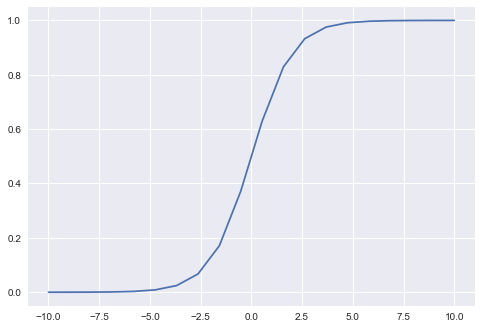

In [17]:
plt.style.use('seaborn')
plt.plot(a,sigmoid(a))

In [18]:
def gradient(X,y,theta):
    """
    X - (m, n+1)
    y - (m, 1)
    theta - (n+1, 1)
    return:
        gradient_vector - (n+1, 1)
    """
    hi = hypothesis(X, theta)
    grad = -np.dot(X.T, (y-hi))
    m = X.shape[0]
    return grad/m

def gradient_descent(X,y,lr = 0.5, max_itr = 500):
    n = X.shape[1]
    theta = np.zeros((n,1))
    error_list = []
    # Assignment Change the stoppig Criteria
    # when the delta is small, then stop the loop
    for i in range(max_itr):
        err = error(X,y,theta)
        error_list.append(err)
        
        grad = gradient(X,y,theta)
        
        theta = theta - lr*grad
        
    return (theta, error_list)

In [19]:
ones = np.ones((X_train.shape[0],1))
X_new_train = np.hstack((ones, X_train))
X_new_train.shape, X_new_train
Y_train = Y_train.reshape((-1,1))

In [20]:
theta,error_list = gradient_descent(X_new_train, Y_train)

In [37]:
theta

array([[-0.13165609],
       [ 3.11418588],
       [ 4.87548572]])

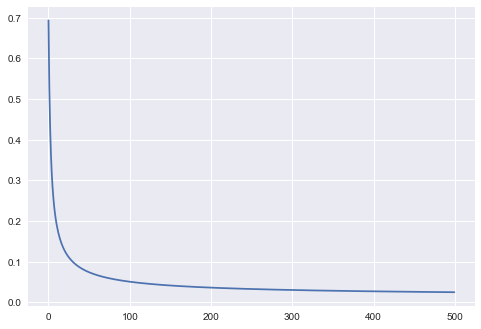

In [21]:
plt.plot(error_list)
plt.show()

### Visualize Decision Boundary

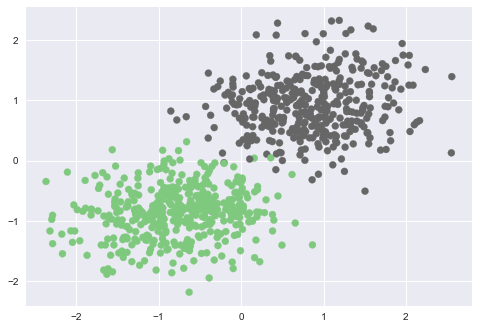

In [22]:
plt.scatter(X_train[:,0], X_train[:,1], c = Y_train.reshape((-1)), cmap = plt.cm.Accent)
plt.show()

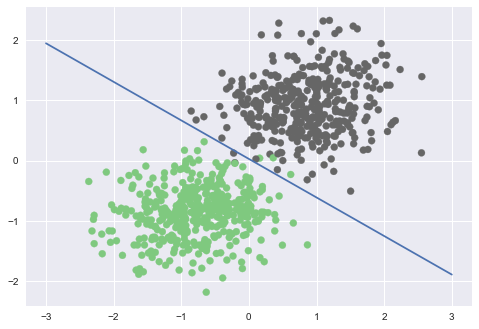

In [23]:
x1 = np.arange(-3,4)
x2 = -(theta[0]+ theta[1]*x1)/theta[2]
plt.plot(x1,x2,label = 'Decision Boundary')
plt.scatter(X_train[:,0], X_train[:,1], c = Y_train.reshape((-1)), cmap = plt.cm.Accent)

plt.show()

### Prediction and Accuracy 

In [24]:
X_new_test = np.hstack((np.ones((X_test.shape[0],1)),X_test))
print(X_new_test.shape)
print(X_new_test[:3,:])

(200, 3)
[[ 1.          3.96234226  4.80923881]
 [ 1.          4.87197909  5.97104062]
 [ 1.         -0.40007554 -0.00811118]]


In [25]:
def predict(X,theta):
    h = hypothesis(X,theta)
    output = np.zeros(h.shape)
    output[h>=0.5] = 1
    output = output.astype('int')
    return output

XT_preds = predict(X_new_train, theta)
Xt_preds = predict(X_new_train, theta)

In [26]:
Xt_preds.shape, Y_test.shape

((800, 1), (200,))

In [27]:
def accuracy(actual, preds):
    actual = actual.astype('int')
    actual = actual.reshape((-1,1))
    acc = np.sum(actual== preds)/actual.shape[0]
    return acc*100

In [28]:
accuracy(Y_train,XT_preds)

99.375

In [29]:
Xt_preds.shape

(800, 1)

In [32]:
accuracy(Y_test, Xt_preds)

<ipython-input-27-6a84e8b1d47e>:4: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  acc = np.sum(actual== preds)/actual.shape[0]


0.0

## Using sk-learn 

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
model = LogisticRegression()

In [35]:
model.fit(X_train, Y_train)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [36]:
theta_0 = model.intercept_
theta_s = model.coef_

print(theta_0, theta_s)

[-0.13161284] [[2.8532427  4.73849581]]


In [38]:
model.score(X_test, Y_test)

0.685

In [39]:
model.score(X_train, Y_train)

0.99375

In [40]:
y_pred = model.predict(X_test)

In [41]:
y_pred

array([1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1.,
       0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.])